Here we are looking at 
1. the run wherein we:

i) fixed the carbon store dynamics 

ii)  have a longer minimum leafon period 

iii)  zero out of the 'dayssincecleafon' counter at leaf-on 

iv) Zeroing GDD at leaf flush AND not letting GDD accumulate in the growing season. 

vs
2. The same thing, PLUS:

v) Not letting GDD increase between the leaf off event and the beginning of the counting period. 

In [1]:
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from matplotlib import pyplot as plt
import datetime
import cartopy
import cartopy.crs as ccrs

Then we choose which simulations to use...

In [2]:
runs = ['clm5-fates_ryanfix_CLD_daily', 'clm5-fates_rosiefix_CLD_daily',\
        'clm5-fates_rosiefix_counter_CLD_daily','clm5-fates_rosiefix_phenmin_counter_CLD_daily',\
       'clm5-fates_rosiefix_phenmin_counter_GDD1_CLD_daily','clm5-fates_rosiefix_phenmin_counter_GDD2_CLD_daily']

Then we make an ugly list of variables to ignore (the files being large)

(n.b. does anyone know how to make this inclusive rather than exclusive? 
Reading in >10 years of 4x5 output takes nearly forever)

In [3]:
drop={'ACTUAL_IMMOB','ATM_TOPO','BCDEP','BTRAN','CBALANCE_ERROR_BGC','CBALANCE_ERROR_ED','CBALANCE_ERROR_TOTAL',
      'CWD_STOCK_COL','C_LBLAYER','C_STOMATA','DENIT','DSL','DSTDEP','DSTFLXT','EFLXBUILD','EFLX_DYNBAL',
      'EFLX_GRND_LAKE','EFLX_LH_TOT','EFLX_LH_TOT_R','EFLXBUILD','EFLX_DYNBAL','EFLX_GRND_LAKE','EFLX_LH_TOT',
      'EFLX_LH_TOT_R','ERRH2O','ERRH2OSNO','ERRSEB','ERRSOI','FCEV','FCOV','FCTR','FFIX_TO_SMINN','FGEV','FGR',
      'FGR12','FH2OSFC','FIRA','FIRA_R','FIRE','FSA','FSAT','FSDS','FSDSND','FSDSNDLN','FSDSNI','FSDSVD','FSDSVDLN',
      'FSDSVI','FSDSVILN','FSH','FSH_PRECIP_CONVERSION','FSH_G','FSH_R','FSH_RUNOFF_ICE_TO_LIQ','FSH_TO_COUPLER',
      'FSH_V','FSM','FSNO','FSNO_EFF','FSR','FSRND','FSRNDLN','FSRNI','FSRVD','FSRVDLN','FSRVI','GROSS_NMIN','H2OCAN',
      'H2OSNO_TOP','HEAT_CONTENT1','HEAT_FROM_AC','HIA','HIA_R','HIA_U','HUMIDEX','HUMIDEX_R','HUMIDEX_U',
      'ICE_CONTENT1','LAKEICEFRAC_SURF','LAKEICETHICK','LIQUID_CONTENT1','LITR1N','LITR1N_vr','LITR2N','LITR2N_vr',
      'LITR3N','LITR3N_vr','NDEP_TO_SMINN','NET_NMIN','O_SCALAR','PARVEGLN','PBOT','PCT_GLC_MEC','POTENTIAL_IMMOB',
      'QCHARGE','QDRAI','QDRAI_PERCH','QDRAI_XS','QDRIP','QFLOOD','QFLOOD','QFLX_DEW_GRND','QFLX_DEW_SNOW',
      'QFLX_EVAP_TOT','QFLX_ICE_DYNBAL','QFLX_LIQ_DYNBAL','QFLX_SNOW_DRAIN','QFLX_SNOW_DRAIN_ICE','QFLX_SUB_SNOW',
      'QH2OSFC','QICE','QICE_FRZ','QICE_MELT','QINFL','QINTR','QIRRIG','QOVER','QRGWL','QRUNOFF','QRUNOFF_ICE',
      'QRUNOFF_TO_COUPLER','QSNOCPLIQ','QSNOFRZ','QSNOFRZ_ICE','QSNOMELT','QSNOMELT_ICE','QSNO_TEMPUNLOAD',
      'QSNO_WINDUNLOAD','QSNWCPICE', 'QSOIL_ICE','SABG_PEN','SABV','SMINN','SMINN_LEACHED','SMINN_TO_PLANT',
      'SNOBCMCL','SNOBCMSL','SNOCAN','SNODSTMCL','SNODSTMSL','SNOFSRND','SNOFSRND','SNOFSRVD','SNOFSRVI',
      'SNOINTABS','SNOOCMCL','SNOOCMSL','SNOTXMASS','SNOUNLOAD','SNOW_PERSISTENCE','SNOW_SINKS','SNOW_SOURCES',
      'SOIL1N','SOIL1N_vr','SOIL2N','SOIL2N_vr','SOIL3N','SOIL3N_vr','SOILC_HR','SOILICE','SOILLIQ','SOILRESIS',
      'SOILWATER_10CM','SOM_C_LEACHED','SUPPLEMENT_TO_SMINN','SWBGT','SWBGT_U','TAUX','TAUY','TKE1','TLAKE',
      'TREFMNAV','TREFMXAV','TSOI_ICE','T_SCALAR','U10','U10_DUST','URBAN_AC','URBAN_HEAT','VOLR','VOLRMCH',
      'WASTEHEAT','WBT','WBT_R','WBT_U','W_SCALAR','ZBOT','ZWT','ZWT_PERCH'}

In [4]:
run = runs[4]
scratch = '/glade/scratch/rfisher/'
arc = scratch + 'archive/' + run + '/lnd/hist/'
#arc = scratch + run + '/run/' 
print(arc)
f1=(arc +run+'.clm2.h0.2001-01-01-00000.nc')
f2=(arc +run+'.clm2.h0.2002-01-01-00000.nc')
f3=(arc +run+'.clm2.h0.2003-01-01-00000.nc')
f4=(arc +run+'.clm2.h0.2004-01-01-00000.nc')
ds0 = xr.open_mfdataset([f2,f3], drop_variables=drop, decode_times=False)
#ds_2003 = xr.open_mfdataset(arc + '2003*', drop_variables=drop, decode_times=False)
arc = scratch + 'archive/' + run + '/lnd/hist/'+ run + '.clm2.h0.' 
#arc = scratch + '/' + run + '/run/' + run + '.clm2.h0.' 
#ds0= xr.open_mfdataset(arc + '2002*', drop_variables=drop, decode_times=False)


/glade/scratch/rfisher/archive/clm5-fates_rosiefix_phenmin_counter_GDD1_CLD_daily/lnd/hist/


In [5]:
run = runs[5]
scratch = '/glade/scratch/rfisher/'
arc = scratch + 'archive/' + run + '/lnd/hist/'
#arc = scratch + run + '/run/'
f1=(arc +run+'.clm2.h0.2001-01-01-00000.nc')
f2=(arc +run+'.clm2.h0.2002-01-01-00000.nc')
f3=(arc +run+'.clm2.h0.2003-01-01-00000.nc')
f4=(arc +run+'.clm2.h0.2004-01-01-00000.nc')
ds1 = xr.open_mfdataset([f2,f3], drop_variables=drop, decode_times=False)
arc = scratch + 'archive/' + run + '/lnd/hist/'+ run + '.clm2.h0.' 
#arc = scratch + '/' + run + '/run/' + run + '.clm2.h0.' 
print(arc)
#ds1 = xr.open_mfdataset(arc + '2002*', drop_variables=drop, decode_times=False)
#ds_2003 = xr.open_mfdataset(arc + '2003*', drop_variables=drop, decode_times=False)

/glade/scratch/rfisher/archive/clm5-fates_rosiefix_phenmin_counter_GDD2_CLD_daily/lnd/hist/clm5-fates_rosiefix_phenmin_counter_GDD2_CLD_daily.clm2.h0.


In [6]:
#plotting years
yr1=1
yr2=3

First lets look at the GDDs

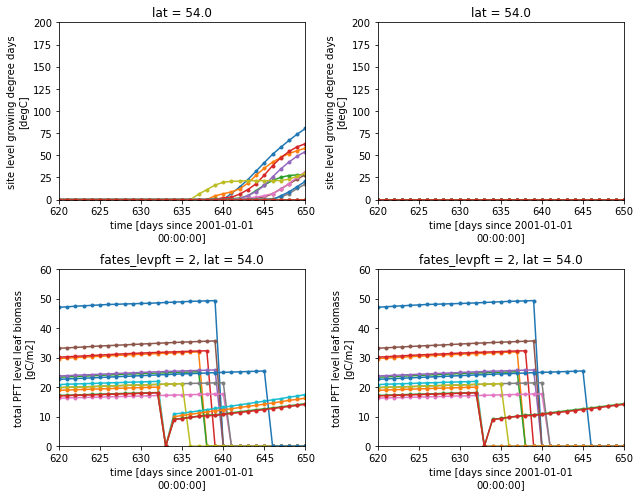

In [7]:
plt.rcParams['figure.figsize'] = [9, 7]
fig,([ax0, ax1],[ax2, ax3]) = plt.subplots(ncols=2, nrows=2)
lats=range(36,37)
lons=range(46,60)
xmn=365*yr1
xmx=365*yr2
xmn=620
xmx=650
ymx=200
for l in lats:
   ds0.SITE_GDD.isel(lat=l,  lon=lons).plot.line(ax=ax0,x='time',add_legend=False, marker='.', xlim=(xmn,xmx), ylim=(0,ymx))
   ds1.SITE_GDD.isel(lat=l, lon=lons).plot.line(ax=ax1,x='time',add_legend=False, marker='.', xlim=(xmn,xmx), ylim=(0,ymx))
   ds0.PFTleafbiomass.isel(lat=l,  lon=lons, fates_levpft=1).plot.line(ax=ax2,x='time',add_legend=False, xlim=(xmn,xmx), marker='.',ylim=(0,60))
   ds1.PFTleafbiomass.isel(lat=l,  lon=lons, fates_levpft=1).plot.line(ax=ax3,x='time',add_legend=False, xlim=(xmn,xmx), marker='.', ylim=(0,60))
plt.tight_layout()

This shows wh had a big impact on the GDD dynamics, which look quite a lot more sensible, but there is really no impact on the leaf dynamics.  Further, the leaves seem to be coming out when the GDDs are rather small. Here we try and predict the GDD thresholds using the equation here:
https://github.com/NGEET/fates/blob/393b905468d93786735a340356d48babc3769988/biogeochem/EDPhysiologyMod.F90#L642
which is 

!  -68 + 638 * (-0.001 * ncd) 
gdd_threshold = ED_val_phen_a + ED_val_phen_b*exp(ED_val_phen_c*real(currentSite%nchilldays,r8))

First double check the parameter values

In [8]:
pftfile='/glade/u/home/rfisher/python_scripts/fates_cld_phenmin.nc'
pfts = xr.open_dataset(pftfile)
print(pfts.fates_phen_a)
print(pfts.fates_phen_b)
print(pfts.fates_phen_c)
print(pfts.fates_phen_chiltemp)
print(pfts.fates_phen_mindayson)

<xarray.DataArray 'fates_phen_a' ()>
array(-68.)
Attributes:
    units:      none
    long_name:  GDD accumulation function, intercept parameter: gdd_thesh = a...
<xarray.DataArray 'fates_phen_b' ()>
array(638.)
Attributes:
    units:      none
    long_name:  GDD accumulation function, multiplier parameter: gdd_thesh = ...
<xarray.DataArray 'fates_phen_c' ()>
array(-0.01)
Attributes:
    units:      none
    long_name:  GDD accumulation function, exponent parameter: gdd_thesh = a ...
<xarray.DataArray 'fates_phen_chiltemp' ()>
array(5.)
Attributes:
    units:      degrees C
    long_name:  chilling day counting threshold
<xarray.DataArray 'fates_phen_mindayson' ()>
array(7776000000000000, dtype='timedelta64[ns]')
Attributes:
    long_name:  day threshold compared against days since leaves became on-al...


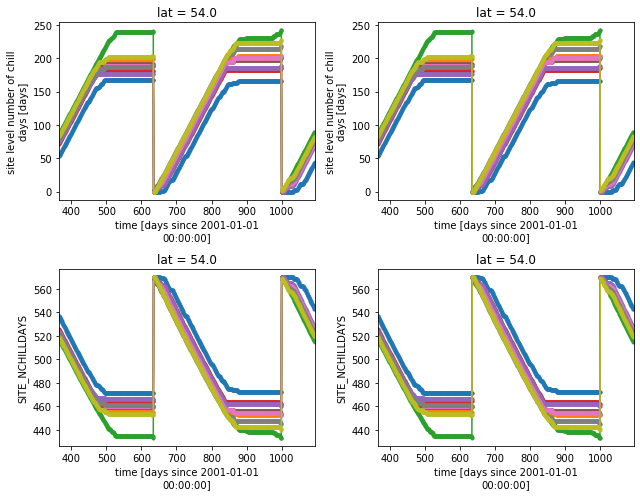

In [9]:
plt.rcParams['figure.figsize'] = [9, 7]
fig,([ax0, ax1],[ax2, ax3]) = plt.subplots(ncols=2, nrows=2)
lats=range(36,37)
lons=range(46,55)
xmn=365*yr1
xmx=365*yr2
ymx=900
a=-0.001 * ds0.SITE_NCHILLDAYS
b=-0.001 * ds1.SITE_NCHILLDAYS
gdd_th0=-68 + 638*np.exp(a)
gdd_th1=-68 + 638*np.exp(b)
for l in lats:
   ds0.SITE_NCHILLDAYS.isel(lat=l,  lon=lons).plot.line(ax=ax0,x='time',add_legend=False, marker='.', xlim=(xmn,xmx))
   ds1.SITE_NCHILLDAYS.isel(lat=l,  lon=lons).plot.line(ax=ax1,x='time',add_legend=False, marker='.', xlim=(xmn,xmx))
   gdd_th0.isel(lat=l,  lon=lons).plot.line(ax=ax2,x='time',add_legend=False, marker='.', xlim=(xmn,xmx))
   gdd_th1.isel(lat=l, lon=lons).plot.line(ax=ax3,x='time',add_legend=False, marker='.', xlim=(xmn,xmx)) 
plt.tight_layout()

This (bottom panels, above) is what I think the GDD thresholds should be, but the leaves are coming on irrespective of the fact that the GDDs never seem to get anywhere near those thresholds.

Something odd is going on here, so we are going to put in a write statement to look at the GDDs


Lets plot some LAI from South America. These are pretty bonkers. 

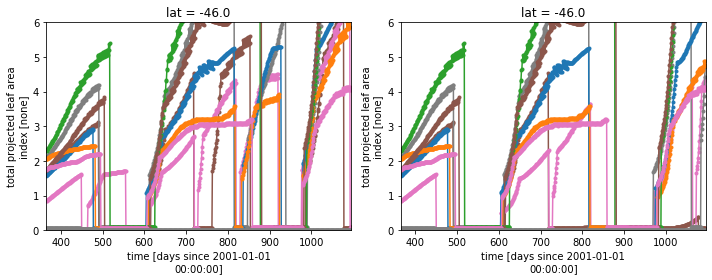

In [10]:
plt.rcParams['figure.figsize'] = [10, 4]
fig,([ax0, ax1]) = plt.subplots(ncols=2, nrows=1)
lats=range(8,12)
lons=range(57,62)
xmn=365*yr1
xmx=365*yr2
ymx=6
for l in lats:
   ds0.TLAI.isel(lat=l,  lon=lons).plot.line(ax=ax0,x='time',add_legend=False, xlim=(xmn,xmx), marker='.', ylim=(0,ymx))
   ds1.TLAI.isel(lat=l,  lon=lons).plot.line(ax=ax1,x='time',add_legend=False, xlim=(xmn,xmx), marker='.', ylim=(0,ymx))
plt.tight_layout()


Here are the GDD and leafc dynamics for S. America

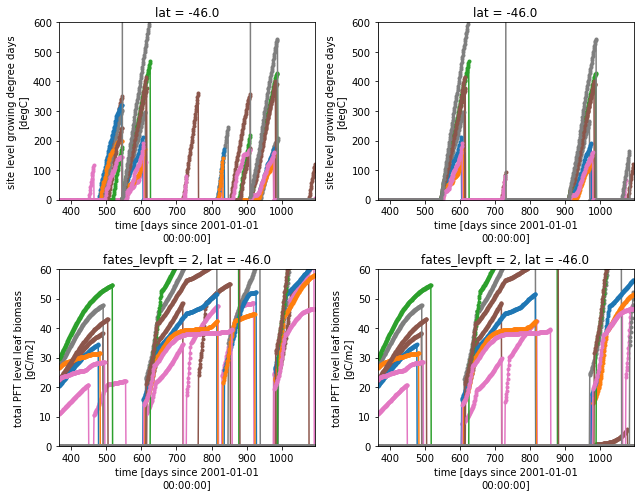

In [11]:
plt.rcParams['figure.figsize'] = [9, 7]
fig,([ax0, ax1],[ax2, ax3]) = plt.subplots(ncols=2, nrows=2)
lats=range(8,12)
lons=range(57,62)
xmn=365*yr1
xmx=365*yr2
ymx=900
for l in lats:
   ds0.SITE_GDD.isel(lat=l,  lon=lons).plot.line(ax=ax0,x='time',add_legend=False, marker='.', xlim=(xmn,xmx),ylim=(0,600))
   ds1.SITE_GDD.isel(lat=l, lon=lons).plot.line(ax=ax1,x='time',add_legend=False, marker='.', xlim=(xmn,xmx),ylim=(0,600))
   ds0.PFTleafbiomass.isel(lat=l,  lon=lons, fates_levpft=1).plot.line(ax=ax2,x='time',add_legend=False, xlim=(xmn,xmx), marker='.',ylim=(0,60))
   ds1.PFTleafbiomass.isel(lat=l,  lon=lons, fates_levpft=1).plot.line(ax=ax3,x='time',add_legend=False, xlim=(xmn,xmx), marker='.', ylim=(0,60))
plt.tight_layout()

Illustrate carbon dynamics for NE US. For several places, there are examples of leafes coming off, and then going straight back on again...  

<xarray.DataArray 'lat' (lat: 1)>
array([54.], dtype=float32)
Coordinates:
  * lat      (lat) float32 54.0
Attributes:
    long_name:  coordinate latitude
    units:      degrees_north
<xarray.DataArray 'lon' (lon: 14)>
array([230., 235., 240., 245., 250., 255., 260., 265., 270., 275., 280., 285.,
       290., 295.], dtype=float32)
Coordinates:
  * lon      (lon) float32 230.0 235.0 240.0 245.0 ... 280.0 285.0 290.0 295.0
Attributes:
    long_name:  coordinate longitude
    units:      degrees_east


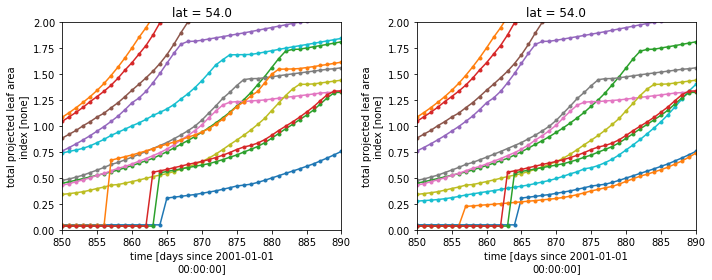

In [12]:
plt.rcParams['figure.figsize'] = [10, 4]
fig,([ax0, ax1]) = plt.subplots(ncols=2, nrows=1)
lats=range(36,37)
lons=range(46,60)
print(ds1.lat[lats])
print(ds1.lon[lons])
xmn=850
xmx=890
ymx=2
for l in lats:
   ds0.TLAI.isel(lat=l,  lon=lons).plot.line(ax=ax0,x='time',add_legend=False, xlim=(xmn,xmx), marker='.', ylim=(0,ymx))
   ds1.TLAI.isel(lat=l,  lon=lons).plot.line(ax=ax1,x='time',add_legend=False, xlim=(xmn,xmx), marker='.', ylim=(0,ymx))
plt.tight_layout()


If we look at the leafoff counter, however, things look at lot more sensible, so I am tempted to keep this change, and search for a different cause for the re-leafing issue.

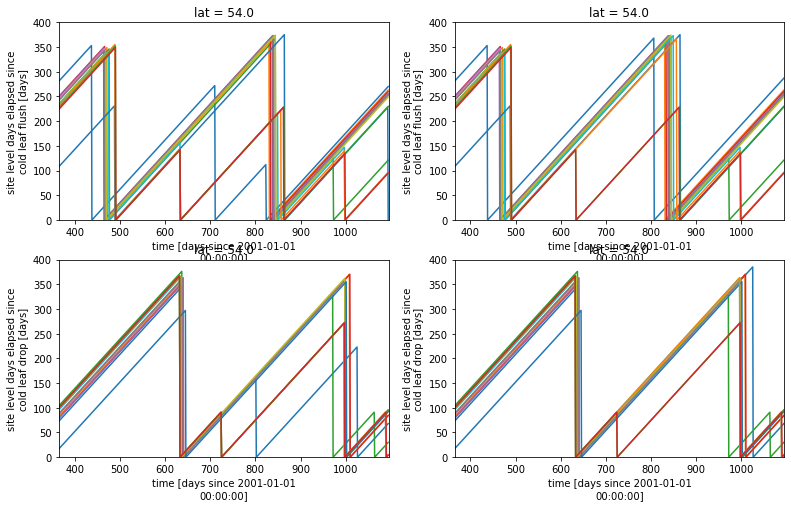

In [13]:
plt.rcParams['figure.figsize'] = [13, 8]
fig,([ax0, ax1],[ax2, ax3]) = plt.subplots(ncols=2, nrows=2)
lats=range(36,37)
lons=range(46,60)
xmn=365*yr1
xmx=365*yr2
ymx=400
for l in lats:
   ds0.SITE_DAYSINCE_COLDLEAFON.isel(lat=l,  lon=lons).plot.line(ax=ax0,x='time',add_legend=False, xlim=(xmn,xmx), ylim=(0,ymx))
   ds1.SITE_DAYSINCE_COLDLEAFON.isel(lat=l, lon=lons).plot.line(ax=ax1,x='time',add_legend=False, xlim=(xmn,xmx), ylim=(0,ymx))
   ds0.SITE_DAYSINCE_COLDLEAFOFF.isel(lat=l,  lon=lons).plot.line(ax=ax2,x='time',add_legend=False, xlim=(xmn,xmx), ylim=(0,ymx))
   ds1.SITE_DAYSINCE_COLDLEAFOFF.isel(lat=l, lon=lons).plot.line(ax=ax3,x='time',add_legend=False, xlim=(xmn,xmx), ylim=(0,ymx))


Plot out the maximum attained GDD

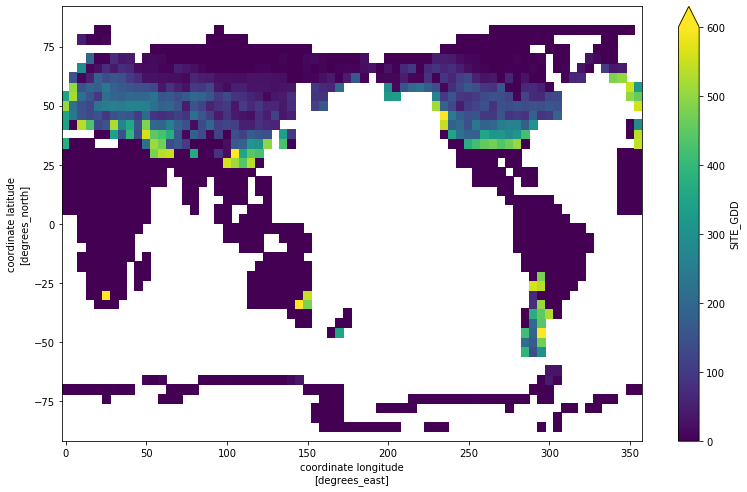

In [14]:
np.max(ds1.SITE_GDD,0).plot(vmax=600)

and the maximum chill days

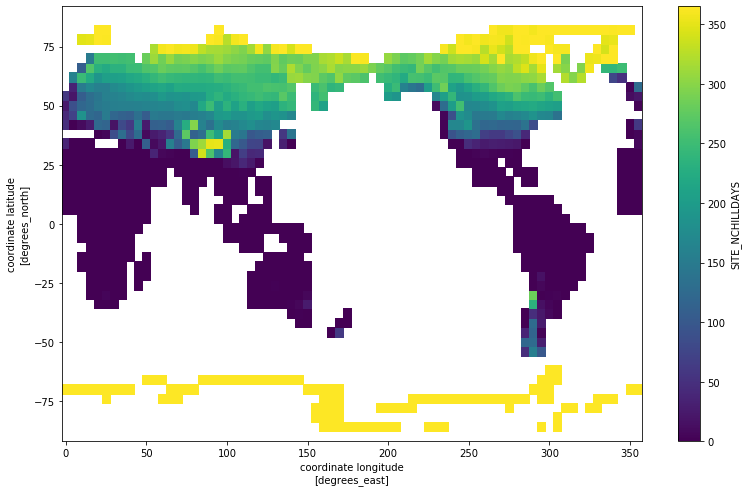

In [15]:
np.max(ds1.SITE_NCHILLDAYS,0).plot()

Text(0.5, 1.0, 'Smoothing effect vs LAI')

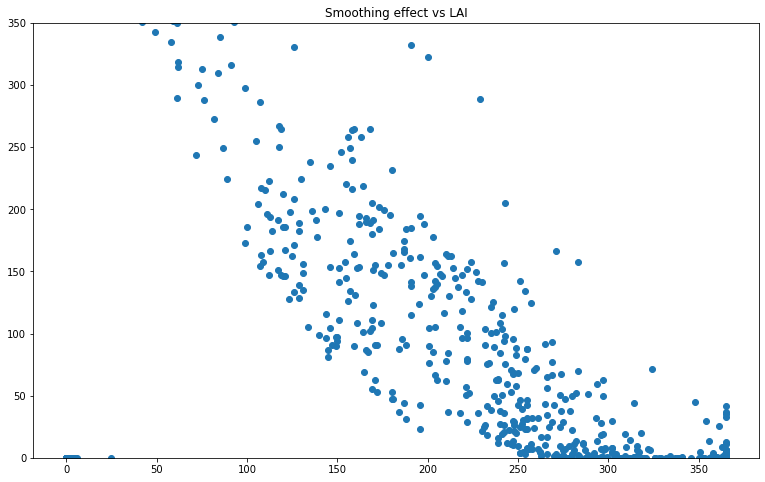

In [16]:
plt.scatter(np.max(ds1.SITE_NCHILLDAYS,0),np.max(ds1.SITE_GDD,0))
plt.ylim(0,600)
plt.ylim(0,350)
plt.title('Smoothing effect vs LAI')